In [195]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [196]:
img = cv2.imread('dog.jpeg',0)

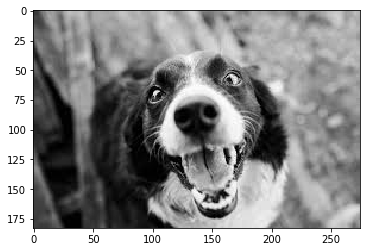

In [197]:
plt.imshow(img,cmap = 'gray')

In [198]:
img.shape

(183, 275)

In [199]:
f = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
f_shift = np.fft.fftshift(f)

f_abs = cv2.magnitude(f_shift[:,:,0],f_shift[:,:,1]) 
f_bounded = 20 * np.log(f_abs+1)

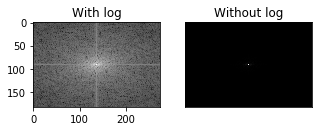

In [200]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(5,5))
ax1.set_title('With log'), plt.xticks([]), plt.yticks([])
ax1.imshow(f_bounded, cmap = 'gray')

ax2.set_title('Without log')
ax2.imshow(f_abs, cmap = 'gray')

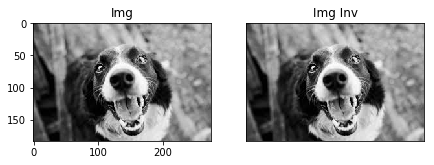

In [201]:
f_ishift = np.fft.ifftshift(f_shift)
img_back = cv2.idft(f_ishift)
img_inv = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])


fig, (ax1, ax2) = plt.subplots(1,2,figsize=(7,7))
ax1.set_title('Img'), plt.xticks([]), plt.yticks([])
ax1.imshow(img, cmap = 'gray')

ax2.set_title('Img Inv')
ax2.imshow(img_inv, cmap = 'gray')

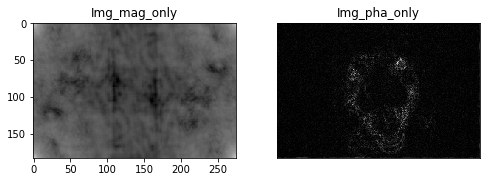

In [202]:
f = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

f_mag = cv2.magnitude(f[:,:,0],f[:,:,1]) 
f_pha = (f[:,:,0] + 1j*f[:,:,1])/f_mag 

img_inv_mag = np.abs(np.fft.ifft2(f_mag))  
img_inv_pha = np.abs(np.fft.ifft2(f_pha))  

img_inv_mag = 20*np.log(img_inv_mag + 1)  
img_inv_pha = 20*np.abs(img_inv_pha + 1)  

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,8))
ax1.set_title('Img_mag_only'), plt.xticks([]), plt.yticks([])
ax1.imshow(img_inv_mag, cmap = 'gray')

ax2.set_title('Img_pha_only')
ax2.imshow(img_inv_pha, cmap = 'gray')

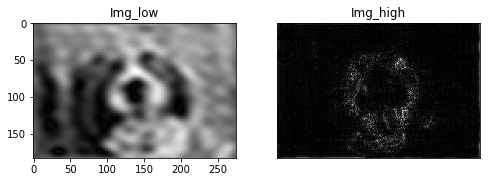

In [203]:
rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)

llim = 10
mask_low = np.zeros((rows,cols,2),np.uint8)
mask_low[crow-llim:crow+llim, ccol-llim:ccol+llim] = 1

f_shift_low = f_shift*mask_low
f_ishift_low = np.fft.ifftshift(f_shift_low)

img_low = cv2.idft(f_ishift_low)
img_low = cv2.magnitude(img_low[:,:,0],img_low[:,:,1])
# ---------------------------------------------------------------------

hlim = 50
mask_high = np.zeros((rows,cols,2),np.uint8)
mask_high[crow-hlim:crow+hlim, ccol-hlim:ccol+hlim] = 1
mask_high = 1-mask_high

f_shift_high = f_shift*mask_high
f_ishift_high = np.fft.ifftshift(f_shift_high)

img_high = cv2.idft(f_ishift_high)
img_high = cv2.magnitude(img_high[:,:,0],img_high[:,:,1])
# ---------------------------------------------------------------------

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,8))
ax1.set_title('Img_low'), plt.xticks([]), plt.yticks([])
ax1.imshow(img_low, cmap = 'gray')

ax2.set_title('Img_high')
ax2.imshow(img_high, cmap = 'gray')

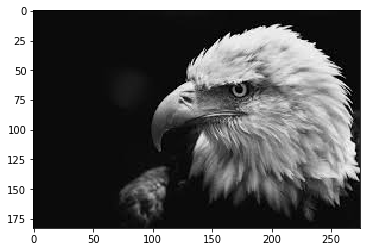

In [204]:
img2 = cv2.imread('eagle.jpeg',0)
plt.imshow(img2, cmap='gray')

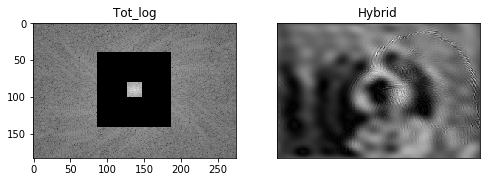

In [213]:
img_dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
img_shift = np.fft.fftshift(img_dft)

img2_dft = cv2.dft(np.float32(img2), flags=cv2.DFT_COMPLEX_OUTPUT)
img2_shift = np.fft.fftshift(img2_dft)

tot_dft = img_shift*mask_low + img2_shift*mask_high

tot_mag = cv2.magnitude(tot_dft[:,:,0], tot_dft[:,:,1]) 
tot_log = 20 * np.log(tot_mag+1)

tot_ishift = np.fft.ifftshift(tot_dft)
tot_back = cv2.idft(tot_ishift)
tot_inv = cv2.magnitude(tot_back[:,:,0],tot_back[:,:,1])

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,8))
ax1.set_title('Tot_log'), plt.xticks([]), plt.yticks([])
ax1.imshow(tot_log, cmap = 'gray')

ax2.set_title('Hybrid')
ax2.imshow(tot_inv, cmap = 'gray')

In [217]:
import math
def gaussianKernel(size_x, size_y, sigma):
    kernel = np.fromfunction(lambda x, y: (1/(2*math.pi*sigma**2)) * math.e ** ((-1*((x-(size_x-1)/2)**2+(y-(size_y-1)/2)**2))/(2*sigma**2)), (size_x, size_y))
    return (kernel-np.min(kernel)) / (np.max(kernel)-np.min(kernel))

In [218]:
gaussianKernel(5, 5, 1)

array([[0.        , 0.06495913, 0.11920292, 0.06495913, 0.        ],
       [0.06495913, 0.35608574, 0.59918956, 0.35608574, 0.06495913],
       [0.11920292, 0.59918956, 1.        , 0.59918956, 0.11920292],
       [0.06495913, 0.35608574, 0.59918956, 0.35608574, 0.06495913],
       [0.        , 0.06495913, 0.11920292, 0.06495913, 0.        ]])

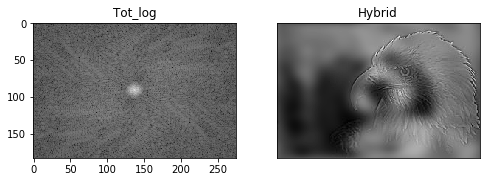

In [225]:
mask_low = np.zeros((rows,cols,2))
mask_high = np.zeros((rows,cols,2))

mask_low[:,:,0] = gaussianKernel(rows, cols, 5)
mask_low[:,:,1] = np.copy(mask_low[:,:,0])

mask_high[:,:,0] = 1 - gaussianKernel(rows, cols, 30)
mask_high[:,:,1] = np.copy(mask_high[:,:,0])

tot_dft = img_shift*mask_low + img2_shift*mask_high

tot_mag = cv2.magnitude(tot_dft[:,:,0], tot_dft[:,:,1]) 
tot_log = 20 * np.log(tot_mag+1)

tot_ishift = np.fft.ifftshift(tot_dft)
tot_back = cv2.idft(tot_ishift)
tot_inv = cv2.magnitude(tot_back[:,:,0],tot_back[:,:,1])

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,8))
ax1.set_title('Tot_log'), plt.xticks([]), plt.yticks([])
ax1.imshow(tot_log, cmap = 'gray')

ax2.set_title('Hybrid')
ax2.imshow(tot_inv, cmap = 'gray')

In [227]:
# generate Gaussian pyramid for Hybrid image
G = tot_inv.copy()
gpA = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpA.append(G)

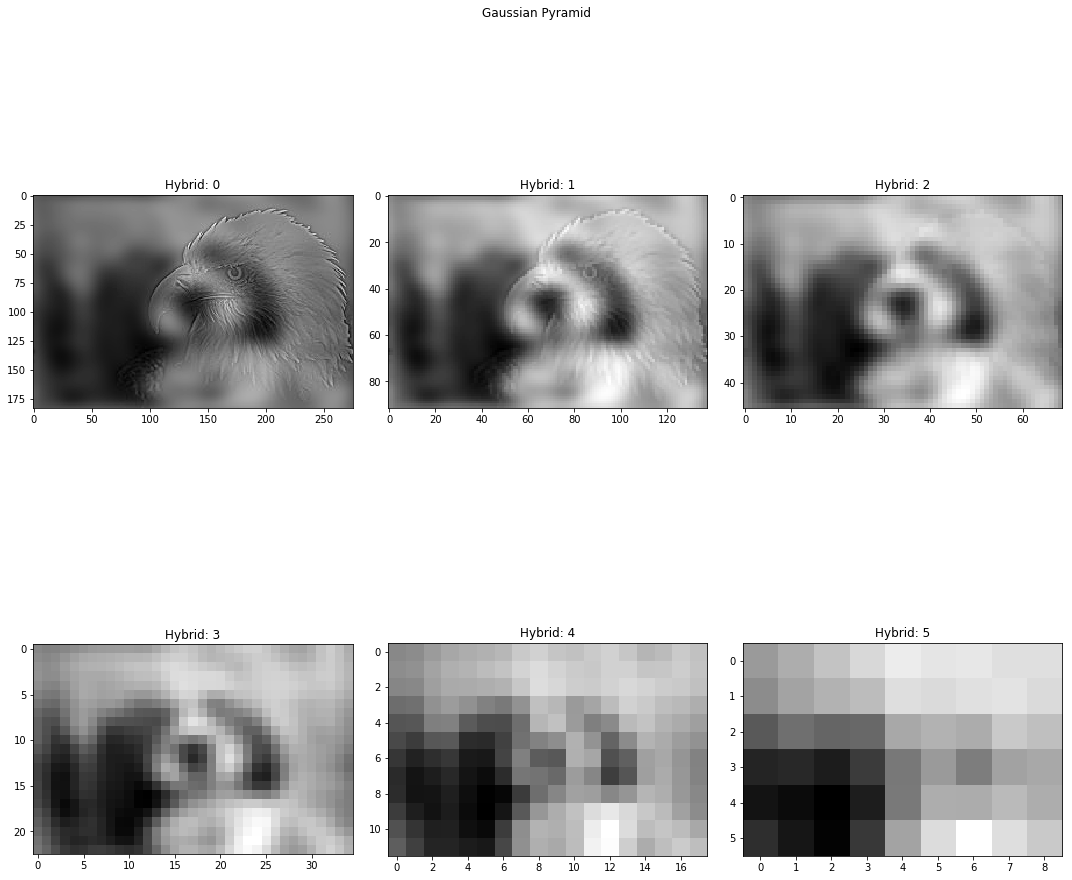

In [241]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,15))
fig.suptitle('Gaussian Pyramid')

for i in range(2):
    for j in range(3):
        axes[i,j].set_title('Hybrid: {}'.format(i*3+j))
        axes[i,j].imshow(gpA[i*3+j], cmap='gray')
        
fig.tight_layout()